In [ ]:
# Data Source: https://www.kaggle.com/worldbank/world-development-indicators
# Folder: 'world-development-indicators'

<br><p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold">
Assignment 1 <br> <br> <br>Exploring Trends in <br> <br><br>Canadas Birth rate</p><br><br>

<br><br><center><h1 style="font-size:2em;color:#2467C0">World Development Indicators</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/4/46/North_South_divide.svg" align="middle" style="width:550px;height:360px;"/></td>
<td>
In this assignment I have used an open dataset from <a href="https://www.kaggle.com">Kaggle</a>. It is  <a href="https://www.kaggle.com/worldbank/world-development-indicators">The World Development Indicators</a> dataset obtained from the World Bank containing over a thousand annual indicators of economic development from hundreds of countries around the world.
<br>
<br>
This is a slightly modified version of the original dataset from <a href="http://data.worldbank.org/data-catalog/world-development-indicators">The World Bank</a>
<br>
<br>
List of the <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/indicators-in-data">available indicators</a> and a <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/countries-in-the-wdi-data">list of the available countries</a>.
</td>
</tr>
</table>

# Step 1: Initial exploration of the Dataset

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')

data.shape

(5656458, 6)

This is a really large dataset, at least in terms of the number of rows.  But with 6 columns, what does this hold?

In [4]:
data.head(5)





,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


Looks like it has different indicators for different countries with the year and value of the indicator. 

### How many UNIQUE country names are there ?

In [5]:
countries = data['CountryName'].unique().tolist()
len(countries)


247

### Are there same number of country codes ?

In [7]:
# How many unique country codes are there ? (should be the same #)
CountryCodes = data['CountryCode'].unique().tolist()
len(CountryCodes)

247

### Are there many indicators or few ?

In [8]:
# How many unique indicators are there ? (should be the same #)
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

Let us extract the List of Indicators to CSV so we can better identify which ones we want to explore together.

In [10]:
import csv
IN = pd.DataFrame(data['IndicatorName'].unique().tolist())
IN.to_csv('IndicatorName.csv', sep=',',encoding ='utf-8')


### How many years of data do we have ?

In [11]:
# How many years of data do we have ?
years = data['Year'].unique().tolist()
len(years)


56

### What's the range of years?

In [25]:
print(min(years)," to ",max(years))


1960  to  2015


<p style="font-family: Arial; font-size:1.5em;color:blue; font-style:bold">
Investigating the Trends in the BirthRate in Canada, Part 1</p><br>

### Extracting data for BirthRate per capita for Canada from the dataset.

In [12]:
# select Birth rate per capita for Canada
hist_indicator = 'Birth rate'
hist_country = 'Canada'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryName'].str.contains(hist_country)

# stage is just those indicators matching Canada for country code and Birth rate over time.
stage = data[mask1 & mask2]
             
print('We have data from ', min(stage['Year'].values), 'to' , max(stage['Year'].values))

We have data from  1960 to 2013


In [30]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
6454,Canada,CAN,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,26.7
30654,Canada,CAN,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1961,26.0
57799,Canada,CAN,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1962,25.2
86169,Canada,CAN,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1963,24.6
114896,Canada,CAN,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1964,23.4


### Let's see how Birth rates have changed over time using MatplotLib

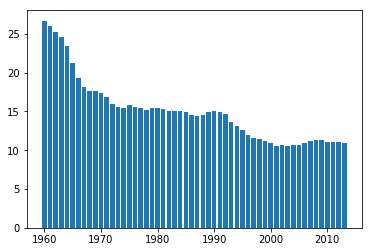

In [31]:
# get the years
years = stage['Year'].values

# get the values 
birth_rate = stage['Value'].values

# create
plt.bar(years,birth_rate)
plt.show()


Turns out Birth rates per capita have dropped a bit over time, but let's make this graphic a bit more appealing before we continue to explore it.

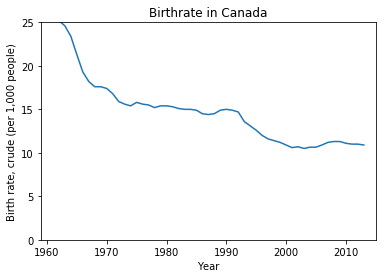

In [48]:
# switch to a line plot
plt.plot(stage['Year'].values, stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

#label the figure
plt.title('Birthrate in Canada')

# to make more honest, start they y axis at 0
plt.axis([1959, 2015,0,25])

plt.show()

### Using Histograms to explore the distribution of values
We could also visualize this data as a histogram to better explore the ranges of values in the Birth rate per year. 

In [36]:
hist_data = stage['Value'].values

In [37]:
print(len(hist_data))

54


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


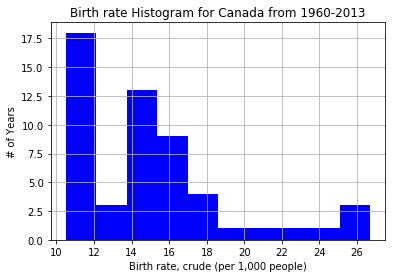

In [38]:
# the histogram of the data
plt.hist(hist_data, 10, normed=False, facecolor='blue')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Birth rate Histogram for Canada from 1960-2013')

plt.grid(True)

plt.show()

So Canada's Birth rate was high >22 per 1000 people only for a few short years.

### But how do Canada's numbers relate to those of other countries?

In [45]:
# select Birthrate for all countries in 2011
hist_indicator = 'Birth rate'
hist_year = [2011]

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['Year'].isin([hist_year])

# apply our mask
birthrate_2011 = data[mask1 & mask2]
birthrate_2011.head()


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026261,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2011,27.038467
5026773,Caribbean small states,CSS,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2011,16.095443
5027279,Central Europe and the Baltics,CEB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2011,9.936685
5027857,East Asia & Pacific (all income levels),EAS,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2011,13.802222
5028444,East Asia & Pacific (developing only),EAP,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2011,14.344617


For how many countries do we have Birth Rate data in 2011

In [46]:
print(len(birthrate_2011))

237


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


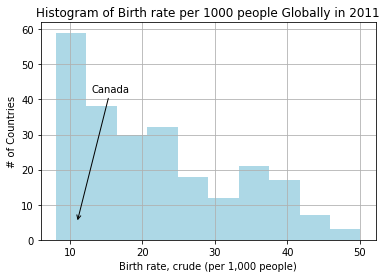

In [47]:
# let's plot a histogram of the Birth rate per capita by country

# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("Canada",
            xy=(11, 5), xycoords='data',
            xytext=(13, 42), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

#plt.hist(co2_2011['Value'], 10, normed=False, facecolor='green')
plt.hist(birthrate_2011['Value'],10, normed = False, facecolor = 'lightblue')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of Birth rate per 1000 people Globally in 2011')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

So the Birth Rate per capita for Canada is quite low among all countries.

An interesting next step is to compare Canada with other Industrialised countries. And also investigate which countries have the highest birthrates > 40 per Capita.

## Investigating other countries with very low birth rates in 2011

In [117]:
#Set Year = 2011
hist_year = 2011

#Set Indicator Name as Birth rate
hist_indicator = 'Birth rate'

#Set 1st Mask of Birth rate <14 in 2011
mask1 = data['Year'].isin([hist_year])
mask2 = data['IndicatorName'].str.contains(hist_indicator)
Br_stage = data[mask1 & mask2]
low_br = Br_stage[Br_stage['Value'].values < 12]

#A double check shows the High Income & High Income: OECD countries 
#have an average Birthrate between 11-12 births per capita.

low_br[low_br['CountryName'].str.contains('High')]
#Set 3rd Mask of Indicator Value >40

#Comment on similarity and differences to Canada

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5032948,High income,HIC,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2011,11.891785
5034123,High income: OECD,OEC,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2011,11.062885


-----Investigating which countries have very High Birth rates per Capita------

In [121]:
#Set Year = 2011
hist_year = 2011

#Set Indicator Name as Birth rate
hist_indicator = 'Birth rate'

#Set 1st Mask of Birth rate <40 in 2011
mask1 = data['Year'].isin([hist_year])
mask2 = data['IndicatorName'].str.contains(hist_indicator)
Br_stage = data[mask1 & mask2]
high_br = Br_stage[Br_stage['Value'].values >40]
high_br.head(15)


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5050501,Angola,AGO,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2011,47.018
5069088,Burkina Faso,BFA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2011,41.679
5069927,Burundi,BDI,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2011,44.489
5075280,Chad,TCD,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2011,46.738
5079606,"Congo, Dem. Rep.",ZAR,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2011,43.266
5098481,"Gambia, The",GMB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2011,43.114
5133213,Malawi,MWI,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2011,40.531
5135798,Mali,MLI,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2011,45.338
5144836,Mozambique,MOZ,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2011,40.590
5150448,Niger,NER,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2011,50.072


African countries have the highest birth rate (40-50) per capita. These countries have among the lowest GDP in the word which further supports the inverse correlation between Birth rate and GDP.

<p style="font-family: Arial; font-size:2.0em;color:blue; font-style:bold">
Exploring the factors that may explain<br><br> the fall in Birth rates in Canada over <br><br>time</p>

### Relationship between GPD and Birth Rate in Canada

In [13]:
# select GDP Per capita emissions for the United States
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'Canada'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryName'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
gdp_stage = data[mask1 & mask2]
gdp_stage.shape
#plot gdp_stage vs stage

(55, 6)

In [122]:
gdp_stage.head(12)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
6505,Canada,CAN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,13570.696410
30709,Canada,CAN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,13722.605016
57858,Canada,CAN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,14428.350276
86230,Canada,CAN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,14895.906582
114957,Canada,CAN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,15596.946845
144780,Canada,CAN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1965,16333.686081
176576,Canada,CAN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1966,17087.953586
208272,Canada,CAN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1967,17272.513381
240922,Canada,CAN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1968,17896.073414
273636,Canada,CAN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1969,18582.992737


In [71]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
6454,Canada,CAN,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,26.7
30654,Canada,CAN,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1961,26.0


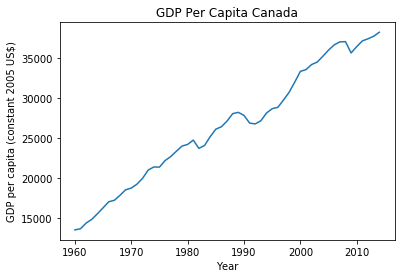

In [14]:
# switch to a line plot
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP Per Capita Canada')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,25])

plt.show()

We see a steady increase in GDP per capita over the years where the Birth rate has steadily fallen.

### ScatterPlot for comparing GDP against Birth rate (per capita)

First, we'll need to make sure we're looking at the same time frames

In [15]:
print("GDP Min Year = ", gdp_stage['Year'].min(), "max: ", gdp_stage['Year'].max())
print("Birth rate Min Year = ", stage['Year'].min(), "max: ", stage['Year'].max())

GDP Min Year =  1960 max:  2014
Birth rate Min Year =  1960 max:  2013


We have 1 extra year of GDP data, so let's trim those off so the scatterplot has equal length arrays to compare (this is actually required by scatterplot)

In [16]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2014]
print(len(gdp_stage_trunc))
print(len(stage))

54
54


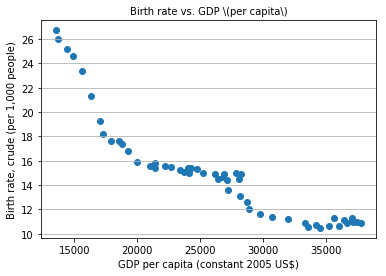

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Birth rate vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc['Value']
Y = stage['Value']

axis.scatter(X, Y)
plt.show()

There is a strong negative correlation between GDP and Birth rate in Canada from the 1960s to 2013.

In [18]:
np.corrcoef(gdp_stage_trunc['Value'],stage['Value'])

array([[ 1.        , -0.90772738],
       [-0.90772738,  1.        ]])

-----------------Fertility Rate in Canada-----------------------

In [93]:
# select Unemployment female
hist_indicator = 'Fertility rate'
hist_country = 'Canada'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryName'].str.contains(hist_country)

#creating a filtered version to match chosen indicator for Canada.
fertility_stage = data[mask1 & mask2]
fertility_stage.shape
#print('we have data from', min(feum_stage['Year'].values))

(54, 6)

Text(0,0.5,'Fertility rate, total (births per woman)')

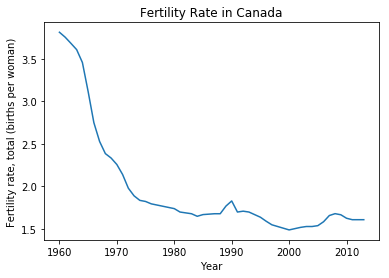

In [110]:
plt.plot(feum_stage['Year'].values,feum_stage['Value'].values)
#Label Title
plt.title('Fertility Rate in Canada')

#Label axis
plt.xlabel('Year')
plt.ylabel(fertility_stage['IndicatorName'].iloc[0])


Fertility rate shows each mother choosing to have on average fewer children. The highest fertility was seen in the baby boom period of 3.8births per mother to the low of 1.6births in this decade.

---------Ratio of Female to Male Labor Force Participation-------

In [107]:
# Ratio of Female to Male Labor Force Participation
hist_indicator = 'Ratio of female to male labor'
hist_country = 'Canada'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryName'].str.contains(hist_country)

#creating a filtered version to match chosen indicator for Canada.
fvm_stage = data[mask1 & mask2]
fvm_stage.shape
#print('we have data from', min(feum_stage['Year'].values))

(60, 6)

Text(0,0.5,'Ratio of female to male labor force participation rate (%) (national estimate)')

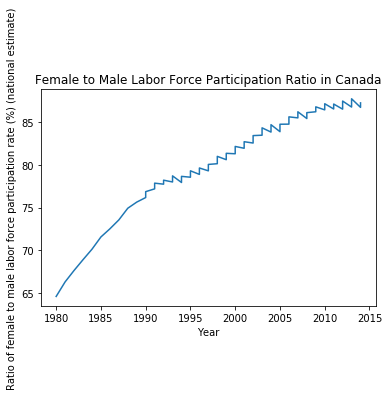

In [109]:
#Lets plot the ratio of Female to Male Labor Force Participation over time
plt.plot(fvm_stage['Year'].values,fvm_stage['Value'].values)

#Provide Title
plt.title('Female to Male Labor Force Participation Ratio in Canada')

# Label the axes
plt.xlabel('Year')
plt.ylabel(fvm_stage['IndicatorName'].iloc[0])

The ratio of Female to Male Labor Force participation has steadily increased from 1980s to 2014. From a low of 0.65 to 0.85. This has coincided with a fall in the Birthrate as women are choosing to be in paid employment instead of staying at home to raise kids.

## Want more ? 

### Matplotlib Examples Library

http://matplotlib.org/examples/index.html

In [ ]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;